# **ПРОЕКТ: СТАТИСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ**



## **ОПИСАНИЕ ДАННЫХ**

Для анализа данных и проверки ряда гипотез, с целью роста бизнеса - популярного сервиса аренды самокатов GoFast, была получена информация о пользователях, их поездках и подписках:

Пользователи (users_go.csv):

   - **user_id** - уникальный идентификатор пользователя
   - **name** - имя пользователя
   - **age** - возраст
   - **city** - город
   - **subscription_type** - тип подписки (free, ultra)
   
Поездки (rides_go.csv):

   - **user_id** - уникальный идентификатор пользователя
   - **distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах)
   - **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
   - **date** -	дата совершения поездки
   
Подписки (subscriptions_go.csv):

   - **subscription_type** - тип подписки
   - **minute_price** - стоимость одной минуты поездки по данной подписке
   - **start_ride_price** - стоимость начала поездки
   - **subscription_fee** - стоимость ежемесячного платежа
   
Тарифы сервиса:

*Без подписки:*

- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

*С подпиской Ultra:*

- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

## ИМПОРТ БИБЛИОТЕК

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## АНАЛИЗ ДАННЫХ

### Шаг 1. Загрузка данных

Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним в датафреймы.

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscr = pd.read_csv('/datasets/subscriptions_go.csv')

Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

**ПОЛЬЗОВАТЕЛИ:**

In [3]:
users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


**ПОЕЗДКИ:**

In [5]:
rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


**ПОДПИСКИ:**

In [7]:
subscr.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**ВЫВОД:** 

Датафрейм users содержит 1565 записей. Типы данных корректны.

Датафрейм rides содержит 18068 записей. Тип данных столбца date - object, необходимо привести к типу даты pandas.

Датафрейм subscr содержит 2 записи. Типы данных корректны.


### Шаг 2. Предобработка данных

#### Приведем столбец date к типу данных pandas.

In [9]:
rides['date'] =pd.to_datetime(rides['date'], format = '%Y.%m.%d')

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Создадим новый столбец с номером месяца на основе столбца date.

In [11]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Проведем проверку на наличие пропущенных значений и дубликато в датафреймах.

**ПОЛЬЗОВАТЕЛИ:**

In [12]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
users.duplicated().sum()

31

In [14]:
users = users.drop_duplicates().reset_index(drop=True)

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [16]:
users.shape[0]

1534

**ПОЕЗДКИ:**

In [17]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [18]:
rides.duplicated().sum()

0

**ПОДПИСКИ:**

In [19]:
subscr.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [20]:
subscr.duplicated().sum()

0

**ВЫВОД:** 

Датафрейм users. Пропуски отсутствуют. 31 дубликат удален. Итоговое количество строк датафрейма - 1534.

Датафрейм rides. Пропуски отсутствуют. Дубликатов нет. Обработка не требуется.

Датафрейм subscr. Пропуски отсутствуют. Дубликатов нет. Обработка не требуется.

### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

#### Частота встречаемости городов

In [21]:
users_town = (
    users
    .pivot_table(index = 'city', values = 'user_id',aggfunc='count')
    .sort_values(by='user_id')
    )

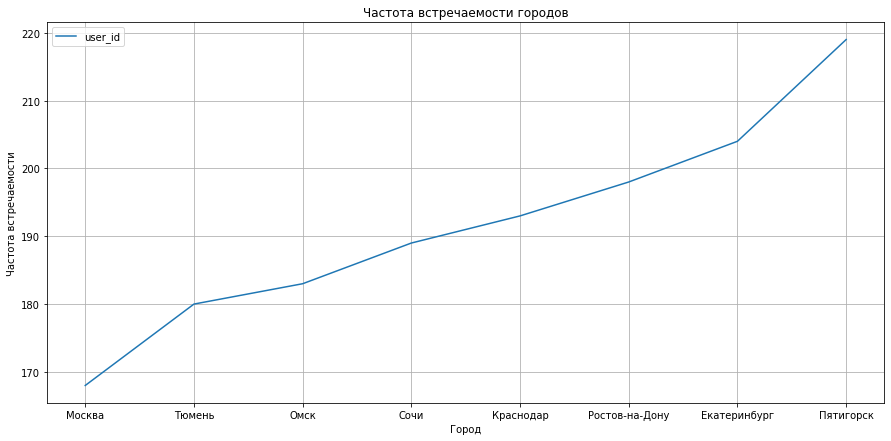

In [22]:
users_town.plot(grid = True, figsize = (15, 7))
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Частота встречаемости')
plt.show()

In [23]:
users_town

,user_id
city,
Москва,168
Тюмень,180
Омск,183
Сочи,189
Краснодар,193
Ростов-на-Дону,198
Екатеринбург,204
Пятигорск,219


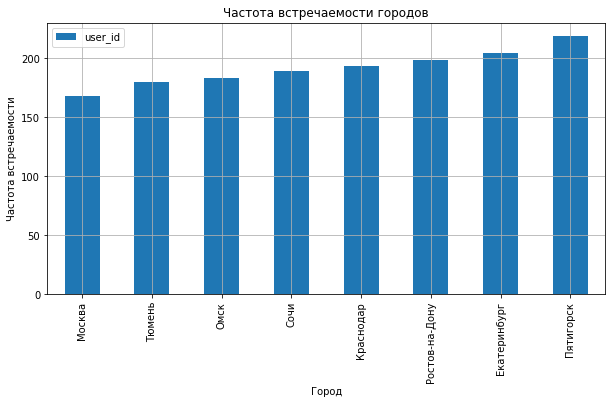

In [24]:
users_town.plot(grid = True, kind = 'bar', figsize = (10, 5))
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Частота встречаемости')

plt.show()

#### Соотношение пользователей с подпиской и без подписки

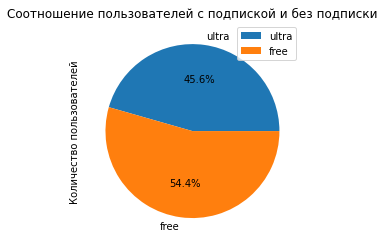

In [25]:
(
    users
    .pivot_table(index = 'subscription_type', values = 'user_id',aggfunc='count')
    .sort_values(by='user_id')
    .plot(y = 'user_id', kind = 'pie', autopct='%1.1f%%')
)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('Количество пользователей')
plt.show()

#### Возраст пользователей

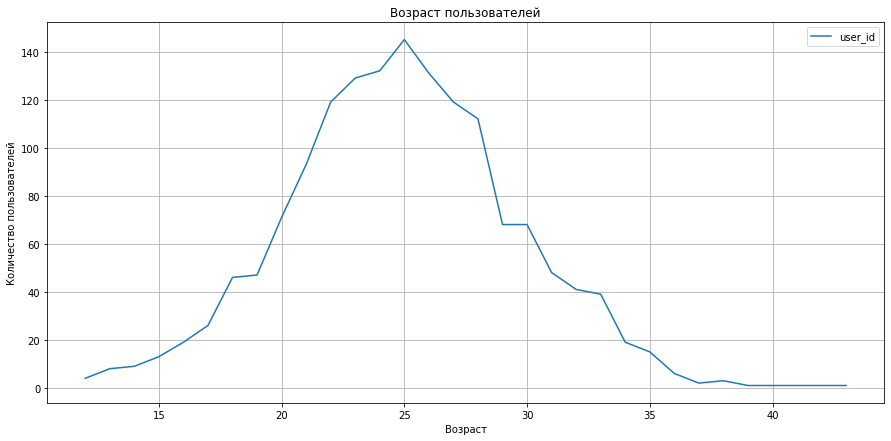

In [26]:
(
    users
    .pivot_table(index = 'age', values = 'user_id',aggfunc='count')
    .sort_values(by='age')
    .plot(grid = True, figsize = (15, 7))
)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

In [27]:
users['age'].describe() 

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

#### Расстояние, которое пользователь преодолел за одну поездку

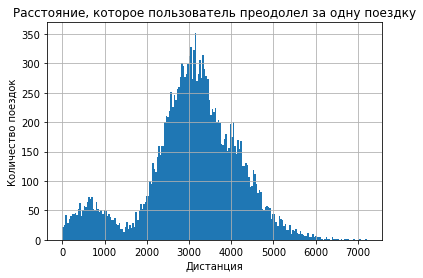

In [28]:
rides['distance'].hist(bins=200)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Дистанция')
plt.ylabel('Количество поездок')
plt.show()

In [29]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

#### Продолжительность поездок

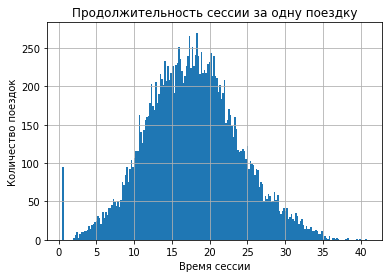

In [30]:
rides['duration'].hist(bins=200)
plt.title('Продолжительность сессии за одну поездку')
plt.xlabel('Время сессии')
plt.ylabel('Количество поездок')
plt.show()

In [31]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

**ВЫВОД:** 

Наибольшее количество пользователей в Пятигорске и Екатеринбурге. Наименьшее в Москве и Тюмени.

Пользователей без подписки немного больше, чем пользователей с подпиской.

Распределение возраст/количество пользователей близко к нормальному. Наибольшее количество пользователей в возрасте 25 лет.

Наибольшее количество поездок на дистанцию в 3 км. В общем пользователи преодолевают от 2,5 до 3,7 км за одну поездку.

Наибольшее количество поездок продолжительностью в 17,7 мин. В общем пользователи тратят от 13 до 21 мин на одну поездку.

Наблюдается выброс - около 100 поездок с продолжительностью в 1 минуту. Учитывая, что при анализе расстояния, которое пользователь преодолел за одну поездку выявлен небольшой пик на которких дистанциях (до 1 км), который соответствует минимальному времени поездок - оставим данные.

### Шаг 4. Объединение данных

#### Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [32]:
merging_data = (
    users
    .merge(rides, on = 'user_id')
    .merge(subscr, on = 'subscription_type')
)
merging_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [33]:
merging_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [34]:
print('Количество строк датафрейма merging_data -', merging_data.shape[0])
print('Количество строк датафрейма rides -', rides.shape[0])

Количество строк датафрейма merging_data - 18068
Количество строк датафрейма rides - 18068


In [35]:
merging_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**ВЫВОД:** 

В объединенном датафрейме merging_data, который содержит в себе данные датафреймов users, rides, subscr, количество строк соответствует исходному датасету rides и равно 18068 строк.

Пропуски отсутствуют.

Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчета стоимости округлим до следующего целого числа.

In [36]:
merging_data['duration'] = np.ceil(merging_data['duration'])

#### Создадим дополнительно два датафрейма с данными о пользователях с подпиской и без.

Датафрейм с данными о пользователях с подпиской:

In [37]:
merging_data_ultra = merging_data[merging_data['subscription_type'] == 'ultra']
merging_data_ultra['subscription_type'].nunique()

1

Датафрейм с данными о пользователях без подписки:

In [38]:
merging_data_free = merging_data[merging_data['subscription_type'] == 'free']
merging_data_free['subscription_type'].nunique()

1

#### Визуализируем информицию о расстоянии и времени поездок для пользователей обеих категорий

**Расстояние:**

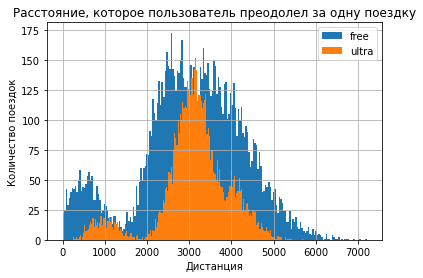

In [39]:
merging_data_free['distance'].hist(bins=200, label='free')
merging_data_ultra['distance'].hist(bins=200, label='ultra')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Дистанция')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

In [40]:
merging_data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [41]:
merging_data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

**Время поездок:**

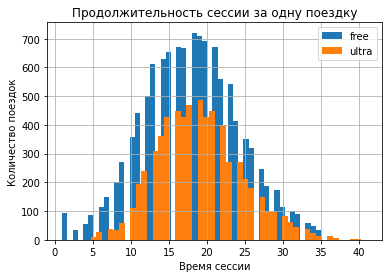

In [42]:
merging_data_free['duration'].hist(bins=50, label='free')
merging_data_ultra['duration'].hist(bins=50,label='ultra')

plt.title('Продолжительность сессии за одну поездку')
plt.xlabel('Время сессии')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

In [43]:
merging_data_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [44]:
merging_data_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

**ВЫВОД:** 

В результате объединения данных о пользователях, их поездках и подписках получен датафрейм **merging_data** на 18068 строк (соответствует данным о поездках) и 12 параметров. Пропусков нет.

Созданы два дополнительных датафрейма с данными о пользователях с подпиской и без: **merging_data_ultra**, **merging_data_free**. 

Визуализация информиции о расстоянии и времени поездок для пользователей обеих категорий показала, что:

   - Медианные значения расстояния поездок у пользователей с и без подписки практически равны - 3 км, однако, в случаях пользователей без прописки наблюдается больший разброс значений  - от 2,3 км до 3,9 км, в то время как у пользователей с пропиской диапазон уже - от 2,7 км до 3,5 км.
   - Медианные значения времени одной поездки у пользователей с подпиской больше на 1 мин. Так же общий разброс в случаях пользователей с пропиской смещен в сторону увеличения времени сессии по сравнению с пользователями без подписки - от 14,5 мин до 21,8 мин (с подпиской) и от 12,9 мин до 21,5 мин (без подписки).

### Шаг 5. Подсчёт выручки

#### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединенными данными для каждого пользователя на каждый месяц.

Найдем:

- суммарное расстояние;
- количество поездок;
- суммарное время.

In [45]:
md_sum = merging_data.pivot_table(
    index=('user_id', 'month'), 
    values=('distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)

In [46]:
md_sum.columns = [
    'number_of_trips', 
    'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee'
]

md_sum.head()

number_of_trips     distance  duration  minute_price  \
user_id month                                                         
1       1                    2  7027.511294      42.0             6   
        4                    1   754.159807       7.0             6   
        8                    2  6723.470560      46.0             6   
        10                   2  5809.911100      32.0             6   
        11                   3  7003.499363      56.0             6   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199

In [47]:
md_sum.isna().sum()

number_of_trips     0
distance            0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64

#### В созданный датафрейм добавим столбец с помесячной выручкой, которую принес каждый пользователь

Обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.

In [48]:
md_sum['income'] = (
    md_sum['start_ride_price'] * md_sum['number_of_trips']+
    md_sum['minute_price'] * md_sum['duration']+
    md_sum['subscription_fee']
)

In [49]:
md_sum.head(10)

number_of_trips      distance  duration  minute_price  \
user_id month                                                          
1       1                    2   7027.511294      42.0             6   
        4                    1    754.159807       7.0             6   
        8                    2   6723.470560      46.0             6   
        10                   2   5809.911100      32.0             6   
        11                   3   7003.499363      56.0             6   
        12                   2   6751.629942      28.0             6   
2       3                    3  10187.723006      63.0             6   
        4                    2   6164.381824      40.0             6   
        6                    1   3255.338202      14.0             6   
        7                    2   6780.722964      48.0             6   

               start_ride_price  subscription_fee  income  
user_id month                                              
1       1                     0               199   451.0  
        4                     0               199   241.0  
        8                     0               199   475.0  
        10                    0               199   391.0  
        11                    0               199   535.0  
        12                    0               199   367.0  
2       3                     0               199   577.0  
        4                     0               199   439.0  
        6                     0               199   283.0  
        7                     0               199   487.0

In [50]:
md_sum['income'].sum()

3878641.0

**ВЫВОД:** 

Выручка за весь период составила 3 878 641 рублей.

### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят величить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

#### Тратят ли пользователи с подпиской больше времени на поездки?

Используем исходные данные о продолжительности каждой сессии - отдельно для подписчиков и тех, у кого нет подписки.

- Нулевая гипотеза - Время на поездки у подписчиков и тех, у кого нет подписки равно;
- Альтернативная гипотеза - Время на поездки у подписчиков больше, чем у кого нет подписки.

In [51]:
alpha = 0.05

results = st.ttest_ind(
    merging_data_ultra['duration'], 
    merging_data_free['duration'], 
    alternative='greater')
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**ВЫВОД:** 

Нулевая гипотеза о равенстве времени поездки у подписчиков и тех, у кого её нет отвергнута. Есть основания полагать, что пользователи с подпиской могут быть "выгоднее" для компании.

#### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Расстояние одной поездки в 3130 метров - оптимальное с точки зрения износа самоката.

- Нулевая гипотеза - Расстояние одной поездки равно 3130 метров;
- Альтернативная гипотеза - Расстояние одной поездки больше 3130 метров.

In [52]:
value = 3130
alpha = 0.05

results = st.ttest_1samp(
    merging_data_ultra['distance'],
    value,
    alternative='greater')
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 0.9195368847849785
Не отвергаем нулевую гипотезу


**ВЫВОД:** 

Нулевая гипотеза не отвергнута, следовательно, с вероятностью 92% можно сказать, что среднее расстояние, которое проезжает пользователи с подпиской за одну поездку не превышает 3130 метров.

#### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без прописки?

Проверим гипотезы:

- Нулевая гипотеза - Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без прописки;
- Альтернативная гипотеза - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без прописки.

In [53]:
alpha = 0.05

income_ultra = md_sum[md_sum['subscription_fee'] == 199]
income_free = md_sum[md_sum['subscription_fee'] == 0]

results = st.ttest_ind(
    income_ultra['income'],
    income_free['income'], 
    alternative='greater')
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**ВЫВОД:** 

Нулевая гипотеза о равенстве выручки от пользователей с подпиской и без отвергнута. Есть основания полагать, что пользователи с подпиской приносят больше выручки компании.

#### Снизится ли количество обращений в техподдержку после обновления сервера, с которым взаимодействует мобильное приложение?

Для проверки гипотезы о сокращении количеств обращений в техподдержку на основании данных о количестве обращений до обновления и после него, нам понадобится тест:

***scipy.stats.ttest_rel***

т.к. анализ проводится по двум зависимым(парным) выборкам.
Гипотеза односторонняя

## ВЫВОД

**Анализируемые данные:**

- Датафрейм users содержит 1565 записей. Типы данных корректны.
- Датафрейм rides содержит 18068 записей. Тип данных столбца date - object, необходимо привести к типу даты pandas.
- Датафрейм subscr содержит 2 записи. Типы данных корректны.

**Результаты предобработки данных:**

- Датафрейм users. Пропуски отсутствуют. 31 дубликат удален. Итоговое количество строк датафрейма - 1534.
- Датафрейм rides. Пропуски отсутствуют. Дубликатов нет. Обработка не требуется.
- Датафрейм subscr. Пропуски отсутствуют. Дубликатов нет. Обработка не требуется.

**Результаты исследовательского анализа данных:**

- Наибольшее количество пользователей в Пятигорске и Екатеринбурге. Наименьшее в Москве и Тюмени.
- Пользователей без подписки немного больше, чем пользователей с подпиской.
- Распределение возраст/количество пользователей близко к нормальному. Наибольшее количество пользователей в возрасте 25 лет.
- Наибольшее количество поездок на дистанцию в 3 км. В общем пользователи преодолевают от 2,5 до 3,7 км за одну поездку.
- Наибольшее количество поездок продолжительностью в 17,7 мин. В общем пользователи тратят от 13 до 21 мин на одну поездку.

**Результаты объединение данных:**

В результате объединения данных о пользователях, их поездках и подписках получен датафрейм **merging_data** на 18068 строк (соответствует данным о поездках) и 12 параметров. Пропусков нет.

Созданы два дополнительных датафрейма с данными о пользователях с подпиской и без: **merging_data_ultra**, **merging_data_free**. 

Визуализация информиции о расстоянии и времени поездок для пользователей обеих категорий показала, что:

   - Медианные значения расстояния поездок у пользователей с и без подписки практически равны - 3 км, однако, в случаях пользователей без прописки наблюдается больший разброс значений  - от 2,3 км до 3,9 км, в то время как у пользователей с пропиской диапазон уже - от 2,7 км до 3,5 км.
   - Медианные значения времени одной поездки у пользователей с подпиской больше на 1 мин. Так же общий разброс в случаях пользователей с пропиской смещен в сторону увеличения времени сессии по сравнению с пользователями без подписки - от 14,5 мин до 21,8 мин (с подпиской) и от 12,9 мин до 21,5 мин (без подписки).


**Подсчёт выручки:**

Выручка за весь период составила **3 878 641** рублей.

**Проверка гипотез:**

- Тратят ли пользователи с подпиской больше времени на поездки?

Нулевая гипотеза о равенстве времени поездки у подписчиков и тех, у кого её нет отвергнута. **Есть основания полагать, что пользователи с подпиской могут быть "выгоднее" для компании.**

- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Нулевая гипотеза не отвергнута, следовательно, **с вероятностью 92% можно сказать, что среднее расстояние, которое проезжает пользователи с подпиской за одну поездку не превышает 3130 метров.**

- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без прописки?

Нулевая гипотеза о равенстве выручки от пользователей с подпиской и без отвергнута. **Есть основания полагать, что пользователи с подпиской приносят больше выручки компании.**

- Снизится ли количество обращений в техподдержку после обновления сервера, с которым взаимодействует мобильное приложение?

Для проверки гипотезы о сокращении количеств обращений в техподдержку на основании данных о количестве обращений до обновления и после него, нам понадобится тест:***scipy.stats.ttest_rel***, т.к. анализ проводится по двум зависимым(парным) выборкам.
